In [138]:
#我感觉iris数据集的准确率100%过于离谱，所以就用这个肿瘤细胞数据集更多数据尝试一下，代码与iris数据集基本没什么差别
#先准备好数据先
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
#设置绘图大小
plt.style.use({'figure.figsize':(25,20)}) # 给画大小, 长25, 宽20

plt.rcParams['font.sans-serif']=['SimHei'] # 正常显示中文
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [139]:
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target
feature_names=cancer.feature_names
data=pd.DataFrame(X, columns=feature_names)
data['result'] = y#好肿瘤or坏肿瘤，0坏1良
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [140]:
data.shape

(569, 31)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [142]:
#添加截距
X=np.hstack((np.ones((X.shape[0],1)), X))


#设置好训练集与测试集
np.random.seed(3)  #我发现随机种子设置越大，似乎准确率越高
#3的时候97%  666_99%    5201314的时候100%
indices=np.random.permutation(len(X))
train_size=int(len(X)*0.8)   #八比二吧
X_train,y_train=X[indices[:train_size]],y[indices[:train_size]]
X_test,y_test=X[indices[train_size:]],y[indices[train_size:]]


# 设置训练集的均值和标准差，对特征进行标准化
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std  # 测试集使用训练集的统计量


#设置好各项参数
class LogisticRegression:
    def __init__(self,alpha=0.01,interation=5000):
        self.alpha=alpha#学习率
        self.interation=interation#迭代次数
        self.theta=None#模型的权重参数W

        self.losshistory=[]#记录下损失值，画可视化函数
    #sigmoid函数        高中信息题出现过的的函数今天也是被我用上了，哈哈
    #Z=参数与X点乘，作为在sigmoid中的最终变量
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def fit(self,X,y):
        m,n=X.shape        #样本数与加了截距的特征数
        self.theta=np.zeros(n)
        for _ in range(self.interation):
            z=np.dot(X,self.theta)
            #算概率h theta
            h=self.sigmoid(z)
            #算出梯度
            gradient=np.dot(X.T,h-y)/m
            #差点忘了更新权重参数
            self.theta=self.theta-self.alpha*gradient
            #算交叉熵
            loss=(-y*np.log(h)-(1-y)*np.log(1-h)).mean()


            self.losshistory.append(loss)
    #返回概率和分类的最终结果
    def predict_hthetax(self,X):
        return self.sigmoid(np.dot(X,self.theta))
    def predict(self,X,threshold=0.5):
        return (self.predict_hthetax(X) >= threshold).astype(int)

In [143]:
#LR的各个板块我们已经弄好了，接下来就开始模型的训练
model=LogisticRegression(alpha=0.01, interation=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#来获取一下准确率，英文怎么拼写来着。。。。accuracy rate就叫ar吧
ar=np.mean(y_pred == y_test)
y_proba=model.predict_hthetax(X_test)#打印样本预测为1的概率
print('准确率Accuracy rate:', ar * 100, '%')

print("\n\n权重参数：", model.theta)
print("\n\n最后一次迭代的损失值：", model.losshistory[-1])

#输出分类结果和错误分析
print("\n测试集分类结果和对应的预测概率")
for i in range(len(y_test)):
    print(f"样本 {i}:预测={y_pred[i]},真实={y_test[i]},预测为1的概率={y_proba[i]:.4f}")

errors=np.where(y_pred != y_test)[0]
print(f"\n错误样本{len(errors)}个")
for i in errors:
    print(f"样本索引 {i}:预测={y_pred[i]},真实={y_test[i]},预测为1的概率={y_proba[i]:.4f}")

准确率Accuracy rate: 97.36842105263158 %


权重参数： [ 4.92547288e-01 -5.48011136e-01 -5.31703620e-01 -5.39758701e-01
 -5.64424890e-01 -2.18962224e-01 -3.61455136e-02 -4.99508089e-01
 -6.13512602e-01 -1.14795922e-01  3.11119559e-01 -6.39172108e-01
  4.43180845e-04 -5.17510624e-01 -5.62358218e-01 -9.63255719e-02
  3.40320722e-01  1.06981919e-01 -1.06130043e-01  1.70438570e-01
  4.03128701e-01 -7.00841945e-01 -6.96555882e-01 -6.71811590e-01
 -6.74304056e-01 -5.21447339e-01 -2.20441800e-01 -5.00580676e-01
 -6.54446262e-01 -4.77550743e-01 -1.83857795e-01]


最后一次迭代的损失值： 0.06689149100169134

测试集分类结果和对应的预测概率
样本 0:预测=0,真实=0,预测为1的概率=0.0000
样本 1:预测=0,真实=0,预测为1的概率=0.1699
样本 2:预测=1,真实=1,预测为1的概率=0.9208
样本 3:预测=1,真实=1,预测为1的概率=0.9924
样本 4:预测=1,真实=1,预测为1的概率=0.9400
样本 5:预测=0,真实=0,预测为1的概率=0.0009
样本 6:预测=1,真实=1,预测为1的概率=0.9998
样本 7:预测=0,真实=0,预测为1的概率=0.0088
样本 8:预测=0,真实=1,预测为1的概率=0.4883
样本 9:预测=1,真实=1,预测为1的概率=0.9992
样本 10:预测=0,真实=0,预测为1的概率=0.0247
样本 11:预测=0,真实=0,预测为1的概率=0.0008
样本 12:预测=1,真实=1,预测为1的概率=0.9999
样本 13

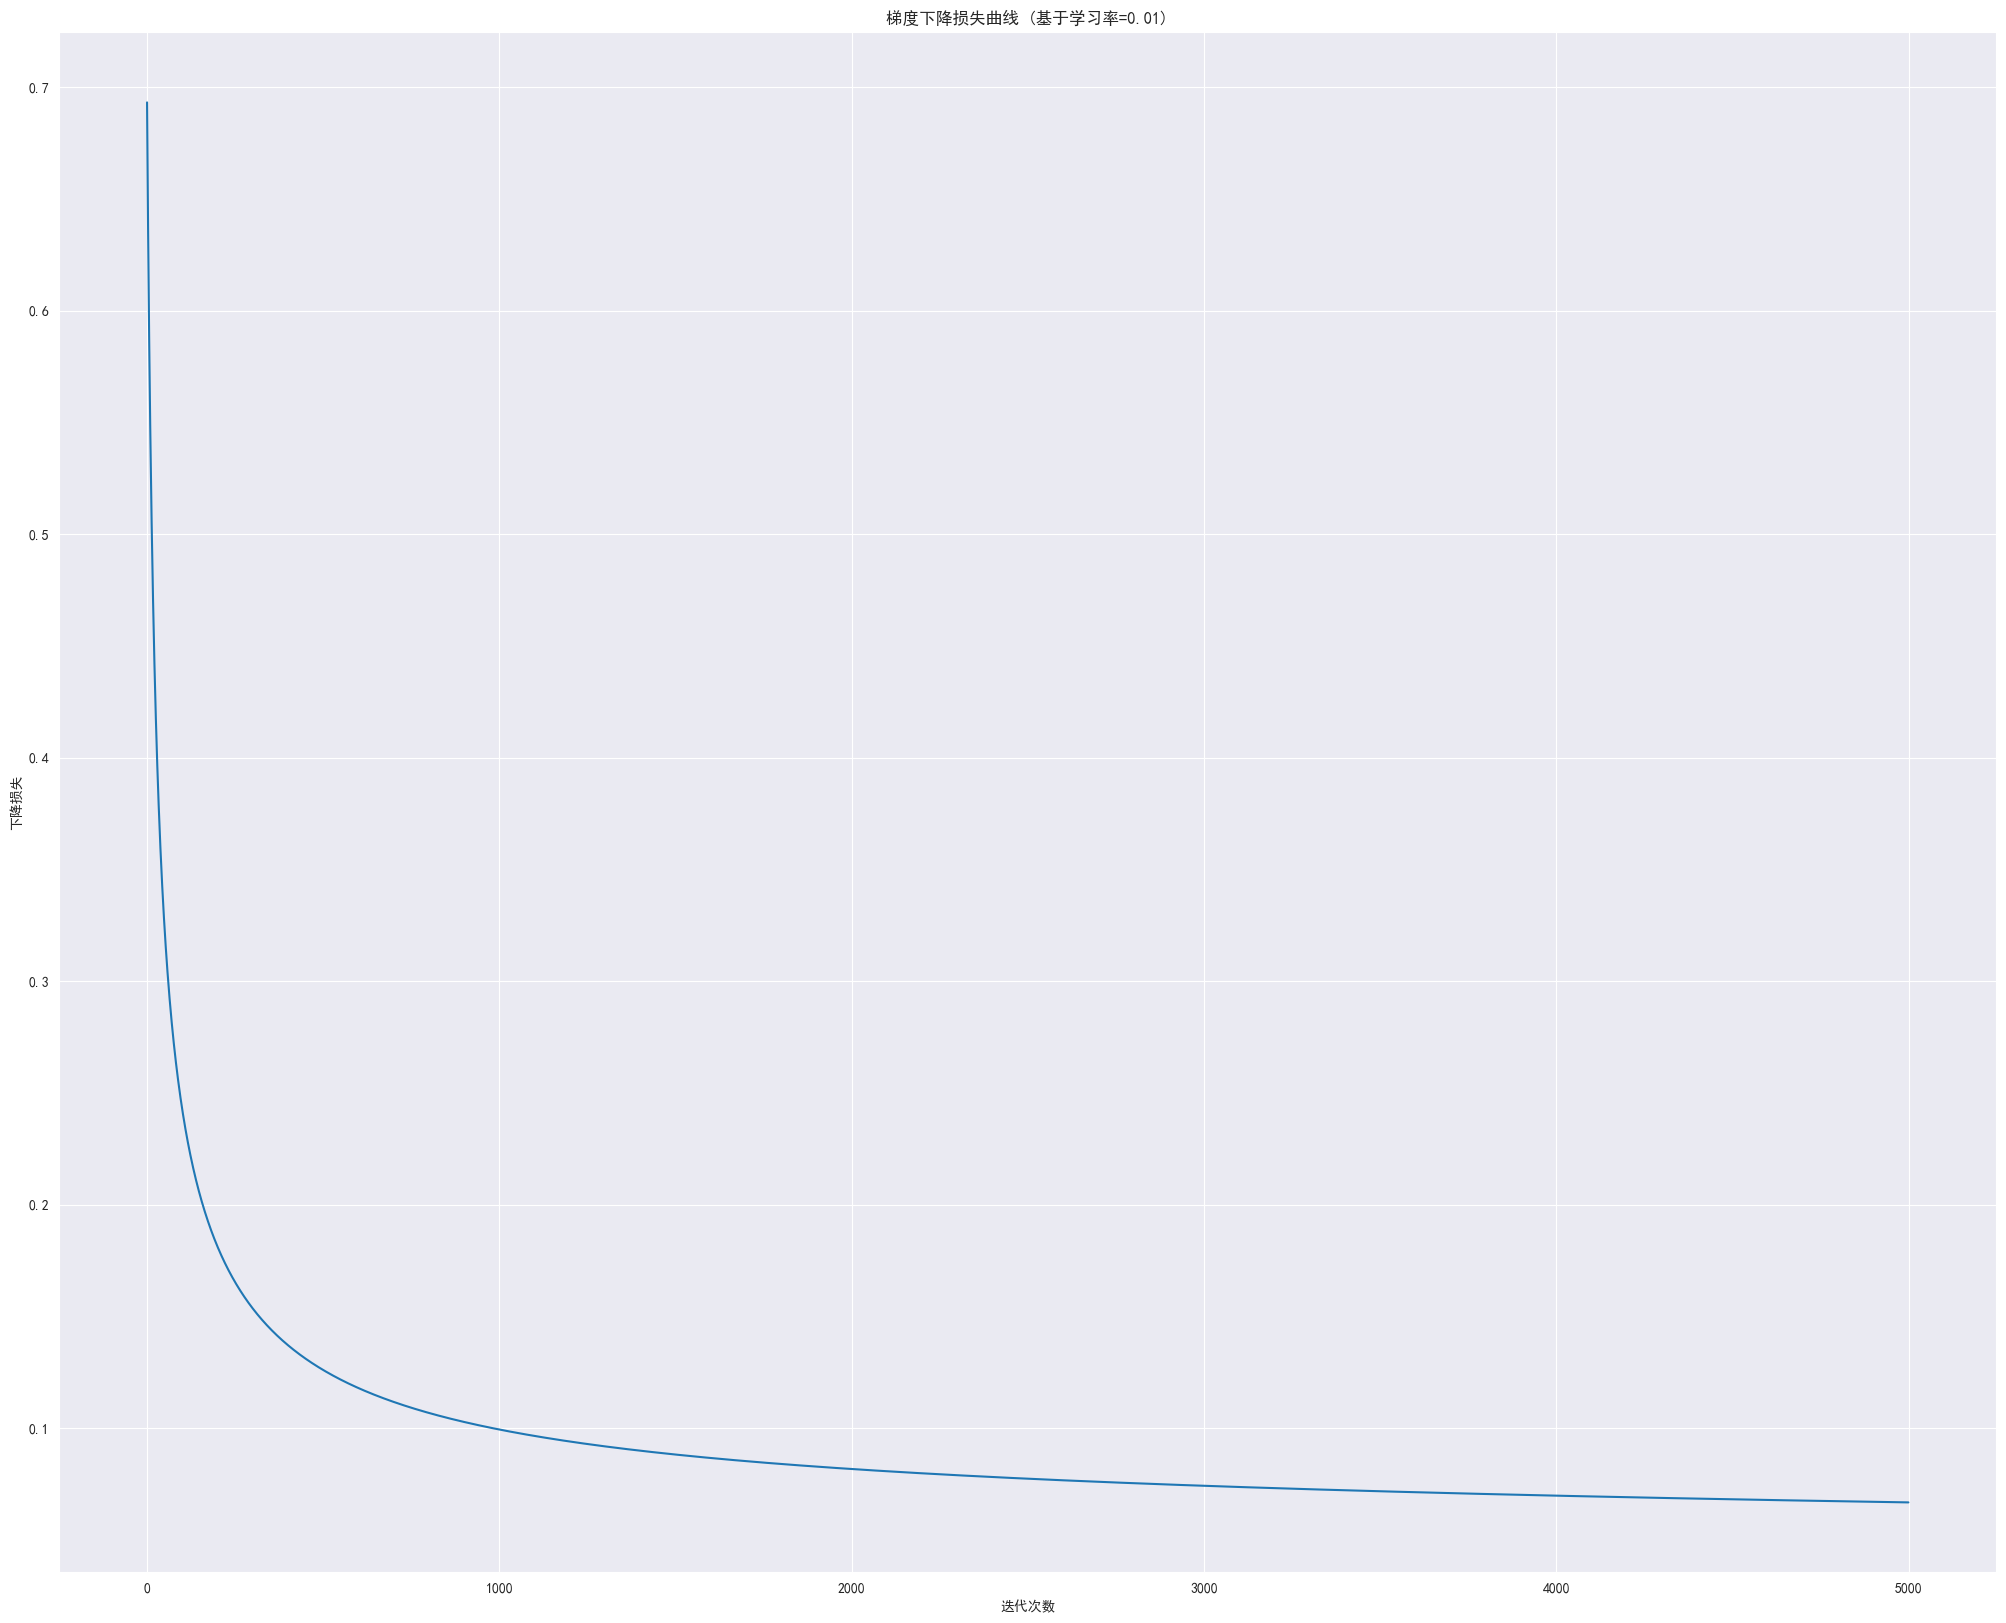

In [144]:
#可视化损失函数
plt.plot(model.losshistory)
plt.xlabel('迭代次数')
plt.ylabel('下降损失')
plt.title('梯度下降损失曲线 (基于学习率=0.01)')
plt.grid(True)
plt.show()